# Formas de separ el fondo de las ondas

Esta demo se centra en la creación de los algorimos de separación del fondo de lo que son las ondas. Esto último, es lo que que realmente dibuja el electrocardiograma.

### Importamos las librerías necesarias

Podemos ver múltiples librerías, cada una tiene su funcionalidad.
* [numpy](https://numpy.org/ "visita la web") es una librería que añade funciones matemáticas extra. Especialmente útil para usar con matrices y vectores.
* [matplotlib.image](https://matplotlib.org/3.1.1/api/image_api.html "Visita la web") sirve para leer **imágenes**.
* [matplotlib.pyplot](https://matplotlib.org/api/pyplot_api.html "Visita la web") es un framework de construcción de gráficos al estilo MATLAB.
* [cv2](https://opencv.org/ "Web oficial") es la librería que usamos para realizar **visión por computador**. Se usa cv2 por convención y compatibilidad con versiones antiguas.

In [2]:
import numpy as np
import matplotlib.image as mpimg  # librería usada para leer imágenes
import matplotlib.pyplot as plt
import cv2  # librería de visión por computador

Ahora se utiliza un comando del entorno Jupiter para integrar las gráficas con el entorno de trabajo.

In [3]:
%matplotlib inline

Commprobamos el directorio de trabajo usando otro comando interno.

In [ ]:
%ls

Leemos y mostramos la imagen en blanco y negro. Esto se realiza para obtener una mejor visualización 

Image dimensions: (546, 728, 3)


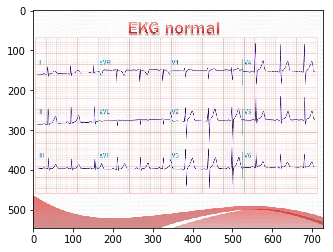

In [15]:
# Lee la imagen
impath ='imagenes/separa/e1.jpg'
image = mpimg.imread(impath)

# Muestra por pantalla las dimensiones de la imagen
print('Image dimensions:', image.shape)

# Pasamos la imagen a color a una en blanco y negro
# gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# plt.imshow(gray_image, cmap='gray') # pasa al espacio de color gris
plt.imshow(image, cmap='gray') # muestra la imagen en color

### Diferencias con la librería OpenCv en la carga de la imagen.

Se utiliza esta librería para cargar y manipular la imagen.

In [13]:
# Cargamos la imagen en librería OpenCV
imagecv = cv2.imread(impath)
# Mostramos por pantalla las características de la imagen
print( 'La imagen es, ', type(imagecv), 'de dimensiones ', imagecv.shape )

La imagen es,  <class 'numpy.ndarray'> de dimensiones  (546, 728, 3)


Ahora se utiliza un comando del entorno Jupiter para integrar las gráficas con el entorno de trabajo.

In [ ]:
%matplotlib inline 

Mostramos la imagen con ***OpenCV***

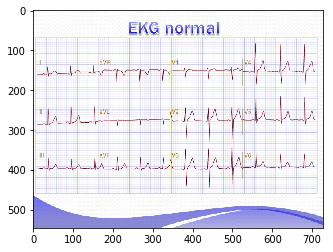

In [14]:
plt.imshow(imagecv)

### Algo importante sobre el color
Como se puede apreciar, OpenCV no lee las imágenes de manera normal. Es decir, esta librería usa el espacio de colores BGR en vez de RGB. Es decir, al leer la imagen y estar esta asignada con el espacio de colores RGB, cambia el rojo por el azul.

Para una correcta lectura del color, debemos primero hacer una copia de la imagen y convertir esta copia al espacio de color RGB. La realización de la copia no es necesaria, pero sí que es una buena práctica. Al ser así una forma de realizar cambios a la imagen sin llegar a transformar la imagen original.

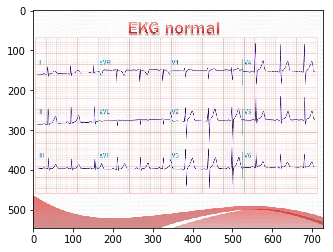

In [16]:
imcopy = np.copy(imagecv)
imcopy = cv2.cvtColor(imcopy, cv2.COLOR_BGR2RGB)
plt.imshow(imcopy)

Ahora ya se aprecia el color como en la imagen original. Esta es la transformación más básica que se puede realizar. Hay que fijarse que para realizar la copia se utilizó la librería ***Numpy*** por ser la imagen de la clase *numpy.ndarray*. Esa es una de las razones por las que se utilizó la función *type()*.

### Elección del color apropiado para extraer las ondas

Primero hay que elegir unos límites para el color a la hora de extraer sólamente ese color. Utilizaremos de nuevo la librería ***Numpy*** que nos ayuda mucho a trabajar con arrays y matrices.

In [139]:
# Para el color azul usamos
tonoMinimoA = np.array([0,0,0])
tonoMaximoA = np.array([50,50,255])

### Creación de la máscara o filtro
La máscara o filtro la usamos para localizar y aislar una zona de interés, a fin de realizar alguna acción con ella. Básicamente lo que se tratará de hacer es localizar en la imagen, todos los tonos de color que estén comprendidos en un rango de color y plasmarlo en un mapa de bits en blanco y negro.

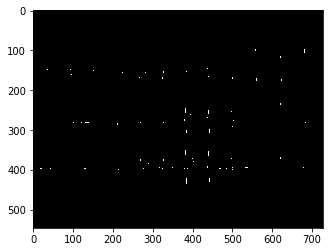

In [140]:
# Definimos la máscara que gestiona el rango de color
msk = cv2.inRange(imcopy, tonoMinimoA, tonoMaximoA)
# Mostramos la imagen de nuevo
plt.imshow(msk, cmap='gray')

Como el azul de la imagen anterior tiene unos tonos de verde y rojo basta subir el rango de los mismos para mejorar los resultados.

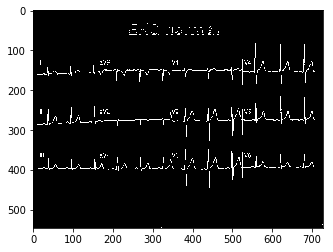

In [115]:
# Utiliza los arrays para obtener diferentes resultados
tonoMinimoA = np.array([0,0,0])
tonoMaximoA = np.array([190,190,255])
# Definimos la máscara que gestiona el rango de color
msk = cv2.inRange(imcopy, tonoMinimoA, tonoMaximoA)
# Mostramos la imagen de nuevo
plt.imshow(msk, cmap='gray')

## Conclusión
Con esto se consiguen unos resultados bastante satisfactorios. No obstante, hay que destacar la importancia a la hora de seleccionar el color. Si se usa esta técnica, se debería proporcionar al usuario un selector de color en la interfaz de usuario. Ya que, aunque generalmente el color será el negro, no se pueden descartar colores como el azul, que también usan algunas máquinas. 

Los puntos blancos que se obtienen en la parte de arriba, forman parte del título insertado en la imagen. Que no aparecerán debido al escalado y corte previo que se realiza sobre las imágenes. Para más información, acudir al apéndice de la memoria, ***Visión por Computador***, apartado de "*Flujo de trabajo*".

###  Como combinar la máscara con la imagen

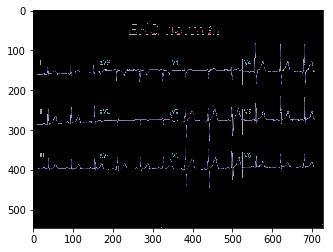

In [119]:
mskim = np.copy(imcopy)
mskim[msk != 255] = [0,0,0]
plt.imshow(mskim)

Así es como se devuelve el color original a la imagen. Ahora se podría combinar con otro fondo.

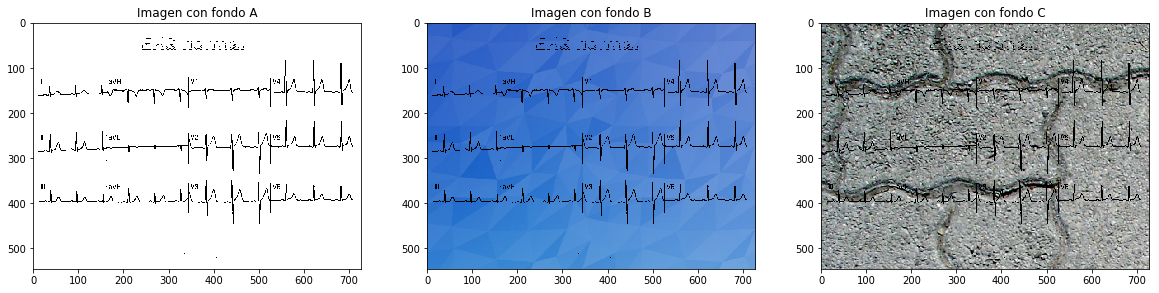

In [127]:
# Buscamos y leemos la imagen de fondo
fondoim1 = cv2.imread('imagenes/separa/f1.jpg')
fondoim1 = cv2.cvtColor(fondoim1, cv2.COLOR_BGR2RGB)
# Cortamos la imagen de fondo para que sea del mismo tamaño que la otra
fondocort1 = fondoim1[0:546, 0:728]
fondocort1[msk !=0 ] = [0,0,0]

fondoim2 = cv2.imread('imagenes/separa/f2.jpg')
fondoim2 = cv2.cvtColor(fondoim2, cv2.COLOR_BGR2RGB)
fondocort2 = fondoim2[0:546, 0:728]
fondocort2[msk !=0 ] = [0,0,0]

fondoim3 = cv2.imread('imagenes/separa/f3.jpg')
fondoim3 = cv2.cvtColor(fondoim3, cv2.COLOR_BGR2RGB)
fondocort3 = fondoim3[0:546, 0:728]
fondocort3[msk !=0 ] = [0,0,0]

# Mostramos las imagenes por pantalla
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('Imagen con fondo A')
ax1.imshow(fondocort1)
ax2.set_title('Imagen con fondo B')
ax2.imshow(fondocort2)
ax3.set_title('Imagen con fondo C')
ax3.imshow(fondocort3)

### Comparativa
Completamos la imagen ahora con el color original. Y comprobamos el resultado.

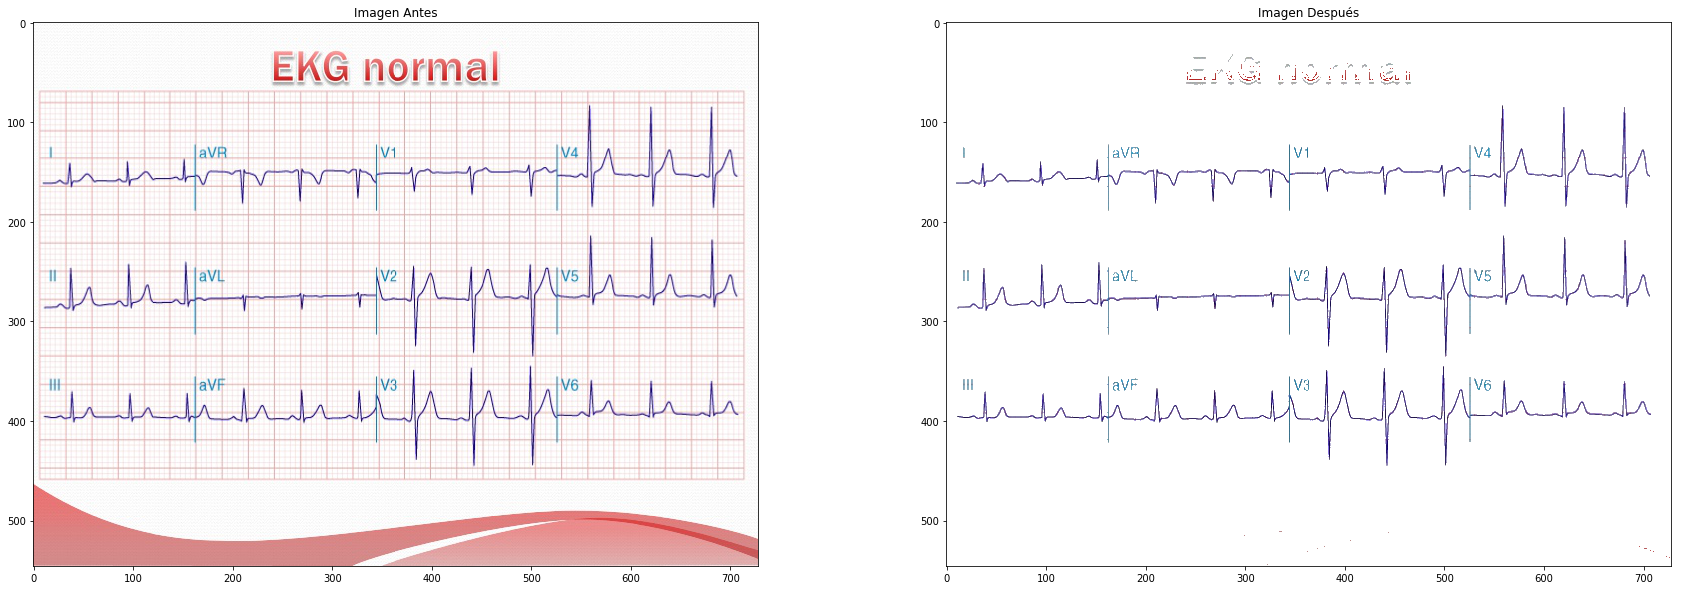

In [138]:
imagenfin = fondocort1 + mskim

# Mostramos las imagenes por pantalla
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
ax1.set_title('Imagen Antes')
ax1.imshow(imcopy)
ax2.set_title('Imagen Después')
ax2.imshow(imagenfin)

El resultado de este experimento no está mal. Se ha conseguido extraer la información con una cierta seguridad de que lo que se ha extraído es lo que hay en la imagen, aunque hay una cierta pérdida de información. Por otro lado, analizando la imagen, que tienen un formato muy correcto y unos colores que no varían demasiado. ***¿Cómo se puede hacer esto mismo cuando varían las condiciones de luz?***

###  Los espacios de color
Los espacios de color, son diferentes formas de organizar los colores de una imagen. Es decir, el espacio de color RGB, se organiza en Rojo, Verde y Amarillo, en cambio el espacio HSV en tono, saturación y valor. Hay multitud de espacios de color, pero este experimento se centrará exclusivamente en los dos anteriormente comentados.

El espacio de color RGB es muy sensible a los cambios de luz. Al ser un espacio de color aditivo (a más luz más blanco) tiene una fuerte dependencia de la luz. Es decir, este espacio sólo suele funcionar bien con colores puros.

Por estas razones, se cambiará al espacio de color a HSV para poder completar el objetivo sin que afecte demasiado el cambio de luminosidad de la imagen.

En el siguiente vídeo en inglés se trata los diferentes espacios de color.

In [150]:
 %%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/teOEtJgkZ58" 
frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; 
picture-in-picture" allowfullscreen></iframe>

### Con el espacio de color RGB

Probamos primero con el espacio de Color RGB

La imagen A es,  <class 'numpy.ndarray'> de dimensiones  (546, 728, 3)
La imagen es,  <class 'numpy.ndarray'> de dimensiones  (546, 728, 3)
La imagen es,  <class 'numpy.ndarray'> de dimensiones  (546, 728, 3)


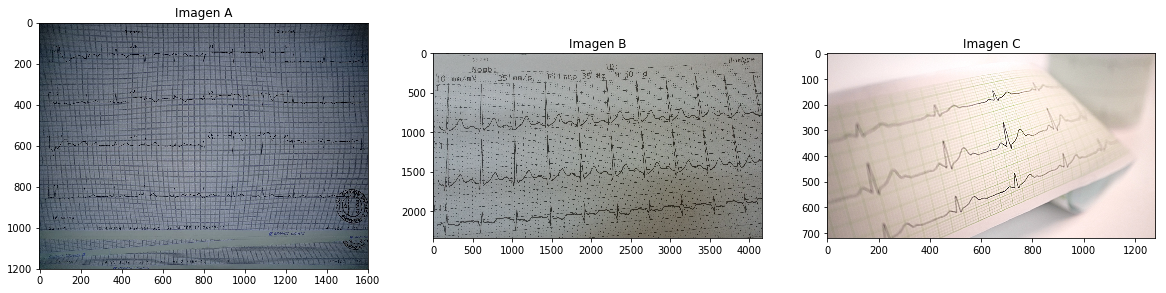

In [154]:
# Cargamos la imagen en librería OpenCV
imagecv1 = cv2.imread('imagenes/separa/l1.jpg')
# Mostramos por pantalla las características de la imagen
print( 'La imagen A es, ', type(imagecv1), 'de dimensiones ', imagecv.shape )

# Cargamos la imagen en librería OpenCV
imagecv2 = cv2.imread('imagenes/separa/l2.jpg')
# Mostramos por pantalla las características de la imagen
print( 'La imagen es, ', type(imagecv2), 'de dimensiones ', imagecv.shape )

# Cargamos la imagen en librería OpenCV
imagecv3 = cv2.imread('imagenes/separa/l3.jpg')
# Mostramos por pantalla las características de la imagen
print( 'La imagen es, ', type(imagecv3), 'de dimensiones ', imagecv.shape )

# Mostramos las imagenes por pantalla
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('Imagen A')
ax1.imshow(imagecv1)
ax2.set_title('Imagen B')
ax2.imshow(imagecv2)
ax3.set_title('Imagen C')
ax3.imshow(imagecv3)

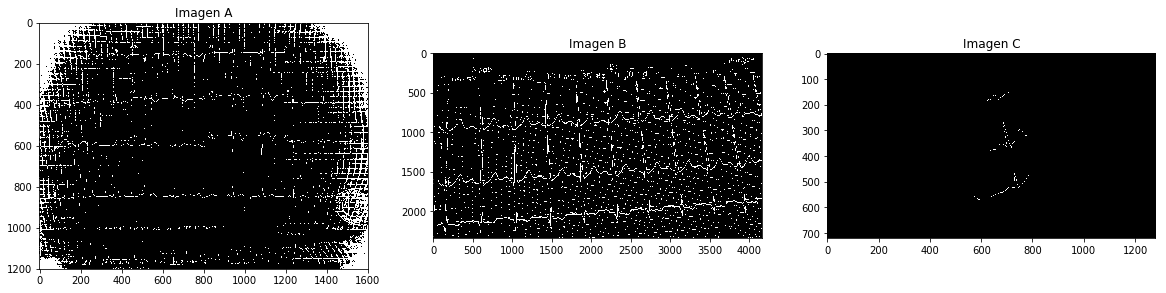

In [260]:
imcopA = np.copy(imagecv1)
imcopA = cv2.cvtColor(imcopA, cv2.COLOR_BGR2RGB)
imcopB = np.copy(imagecv2)
imcopB = cv2.cvtColor(imcopB, cv2.COLOR_BGR2RGB)
imcopC = np.copy(imagecv3)
imcopC = cv2.cvtColor(imcopC, cv2.COLOR_BGR2RGB)

# definimos el rango de color en este caso es negro
tonoMinimo = np.array([0,0,0])
tonoMaximo = np.array([90,90,90])
# Definimos la máscara que gestiona el rango de color
mskA = cv2.inRange(imcopA, tonoMinimo, tonoMaximo)
mskB = cv2.inRange(imcopB, tonoMinimo, tonoMaximo)
mskC = cv2.inRange(imcopC, tonoMinimo, tonoMaximo)


# Mostramos las imagenes por pantalla
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('Imagen A')
ax1.imshow(mskA, cmap='gray')
ax2.set_title('Imagen B')
ax2.imshow(mskB, cmap='gray')
ax3.set_title('Imagen C')
ax3.imshow(mskC, cmap='gray')

Se observa un gran número de interferéncias en la imagen A y en la B así como una falta de captura en la imagen C. Aunque se cambien los valores, se suele obtener una respuesta homogenea en cada imagen.

###  Ahora con el espacio de color HSV

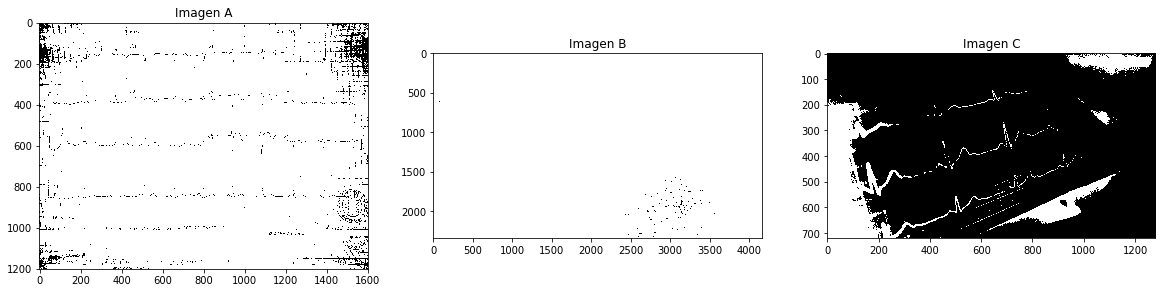

In [341]:
imcopA = np.copy(imagecv1)
imcopA = cv2.cvtColor(imcopA, cv2.COLOR_BGR2HSV)
imcopB = np.copy(imagecv2)
imcopB = cv2.cvtColor(imcopB, cv2.COLOR_BGR2HSV)
imcopC = np.copy(imagecv3)
imcopC = cv2.cvtColor(imcopC, cv2.COLOR_BGR2HSV)

# definimos el rango de color en este caso es negro

# Estos valores extraen mejor la información de la tercera fotografía (C)
tonoMinimo = np.array([0,0,0])
tonoMaximo = np.array([360,90, 192])

# Estos valores extraen mejor la información de la segunda fotografía (B)
#tonoMinimo = np.array([0,0,0])
#tonoMaximo = np.array([360,100, 100])

# Estos valores extraen mejor la información de la primera fotografía (A)
#tonoMinimo = np.array([0,80,0])
#tonoMaximo = np.array([360, 255, 100])

# Definimos la máscara que gestiona el rango de color
mskA = cv2.inRange(imcopA, tonoMinimo, tonoMaximo)
mskB = cv2.inRange(imcopB, tonoMinimo, tonoMaximo)
mskC = cv2.inRange(imcopC, tonoMinimo, tonoMaximo)


# Mostramos las imagenes por pantalla
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('Imagen A')
ax1.imshow(mskA, cmap='gray')
ax2.set_title('Imagen B')
ax2.imshow(mskB, cmap='gray')
ax3.set_title('Imagen C')
ax3.imshow(mskC, cmap='gray')

#plt.figure(figsize = (20,30))
#plt.imshow(mskC, cmap='gray', aspect='auto')

A pesar de que se pueden obtener mejores resultados de manera individual, pues se puede controlar la luminosidad de manera independiente. Este método tiene otros inconvenientes. Sería muy útil si queremos localizar un color en particular, sin que le afecten las luces y sombras, pero esto no ocurre en el caso del color negro. Esto es debido a que cualquier color se vuelve negro cuando la luminosidad es baja, así se vuelve complejo. Más adelante se estudiarán otros métodos que se pueden aplicar a esto.

Es por tanto descartable por el momento, el análisis de imágenes no escaneadas o extraídas diréctamente de otro programa, archivo edf o del electrocardiógrafo diréctamente. Es decir, de momento se excluyen fotografías realizadas con el móvil.